In [1]:
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
df = pd.read_csv ('DarknetTraffic.csv')
print(len(df))
df

141041


,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Conn Type,Purpose
0,0,57158,225,443,6,1437768588,229,1,1,0,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1,3
1,0,57159,225,443,6,1437768588,407,1,1,0,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1,3
2,0,57160,225,443,6,1437768588,431,1,1,0,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1,3
3,0,49134,225,443,6,1437768588,359,1,1,0,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1,3
4,0,34697,225,19305,6,1437768585,10778451,591,400,64530,...,0,0,0,0,1.440000e+15,3.117718e+06,1.440000e+15,1.440000e+15,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141036,0,55219,0,5355,17,1432317303,411806,2,0,44,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3,8
141037,0,64207,0,5355,17,1432318145,411574,2,0,44,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3,8
141038,0,61115,0,5355,17,1432318771,422299,2,0,44,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3,8
141039,0,64790,0,5355,17,1432319395,411855,2,0,44,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3,8


In [3]:
# Remove duplicate entries
df.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=False)

# Remove constant columns
df = df.loc[:, df.apply(pd.Series.nunique) != 1]
df = df.dropna(axis=0,how='any')
len(df)

116711

In [4]:
best_features = ['Idle Max','FWD Init Win Bytes','Idle Mean','Idle Min','Fwd Seg Size Min',
                 'Subflow Fwd Packets', 'Flow Duration', 'Flow IAT Max','Flow IAT Min',
                 'Flow IAT Mean','Fwd Packets/s','Flow Packets/s','Bwd Init Win Bytes',
                 'Protocol','FIN Flag Count','Bwd Packets/s','Fwd IAT Max','Bwd Packet Length Mean',
                 'Bwd Packet Length Min','Fwd IAT Total','Conn Type']#, 'Purpose']

df = df[best_features]

1    68990
2    23833
3    22853
4     1035
Name: Conn Type, dtype: int64

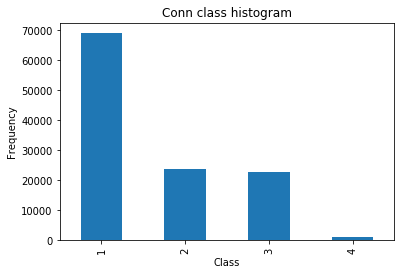

In [5]:
pd.value_counts(df['Conn Type']).plot.bar()
plt.title('Conn class histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')
df['Conn Type'].value_counts()

In [6]:
tor = df.loc[df['Conn Type'] > 2 ]

In [7]:
len(tor)

23888

In [8]:
X = tor.iloc[:, 0:(df.shape[1]-1)]#<----------features
Y = tor.iloc[:, -1]#<---------labels  1 ---->purpose=traffic categorization
print(X.shape,Y.shape)                        #2------->conn type traffic detection  Tor n stuff
Y

(23888, 20) (23888,)


117047    4
117048    4
117049    4
117050    4
117051    4
         ..
141036    3
141037    3
141038    3
141039    3
141040    3
Name: Conn Type, Length: 23888, dtype: int64

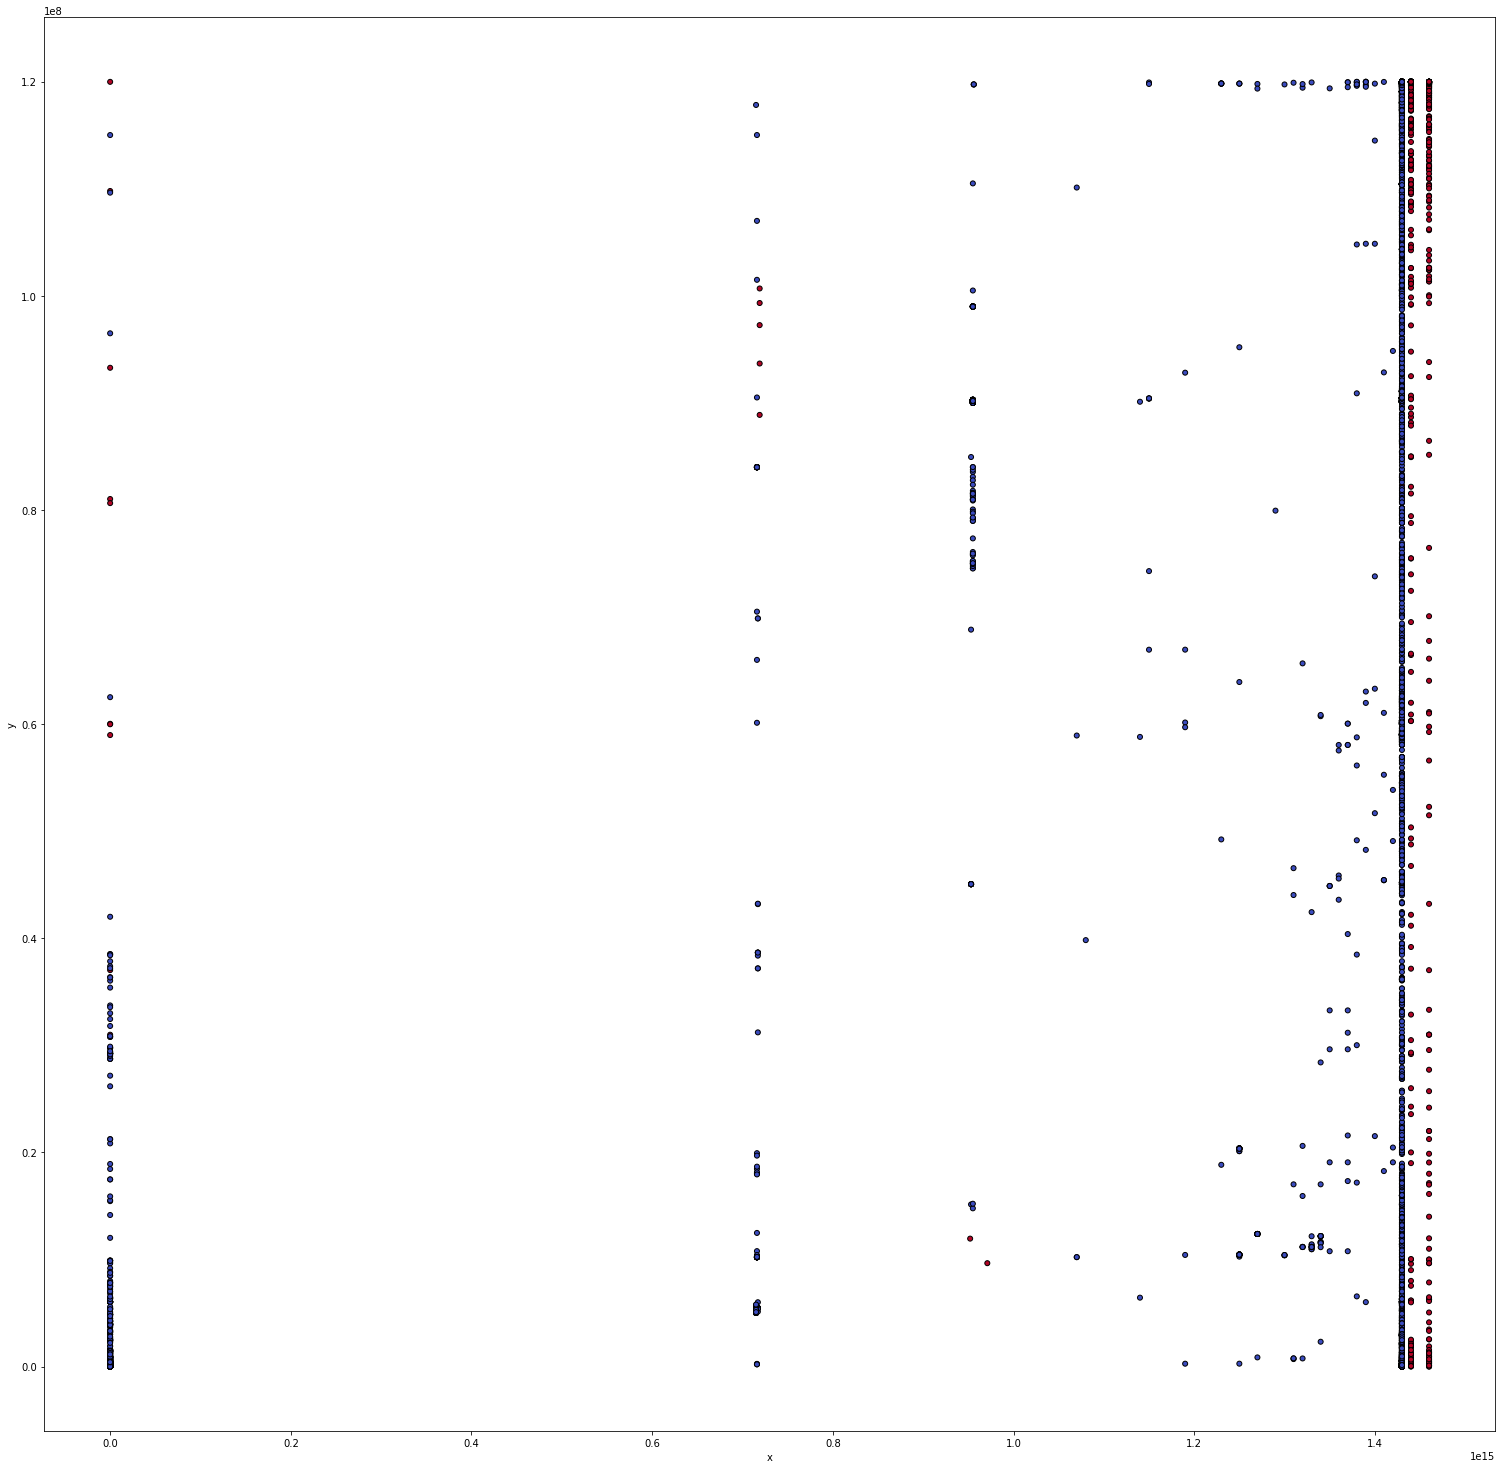

In [9]:
#SMOTE#
k=8
seed = 100
from imblearn.over_sampling import SMOTE

f = plt.figure()
f.set_figwidth(26)
f.set_figheight(26)
 

#plt.title('Dataset balanced with synthetic or SMOTEd data ({} neighbors)'.format(k))

plt.xlabel('x')

plt.ylabel('y')

plt.scatter(X.iloc[:, 2], X.iloc[:, -1], marker='o', c=Y,

           s=25, edgecolor='k', cmap=plt.cm.coolwarm)

plt.show()


In [10]:
sm = SMOTE(sampling_strategy='auto', k_neighbors=k, random_state=seed)

X_res, y_res = sm.fit_resample(X, Y)


(23888, 20) (23888,)


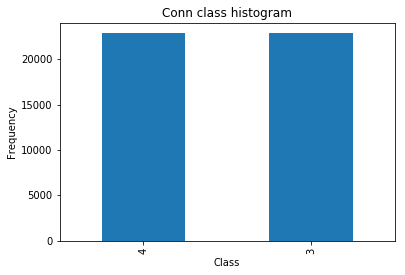

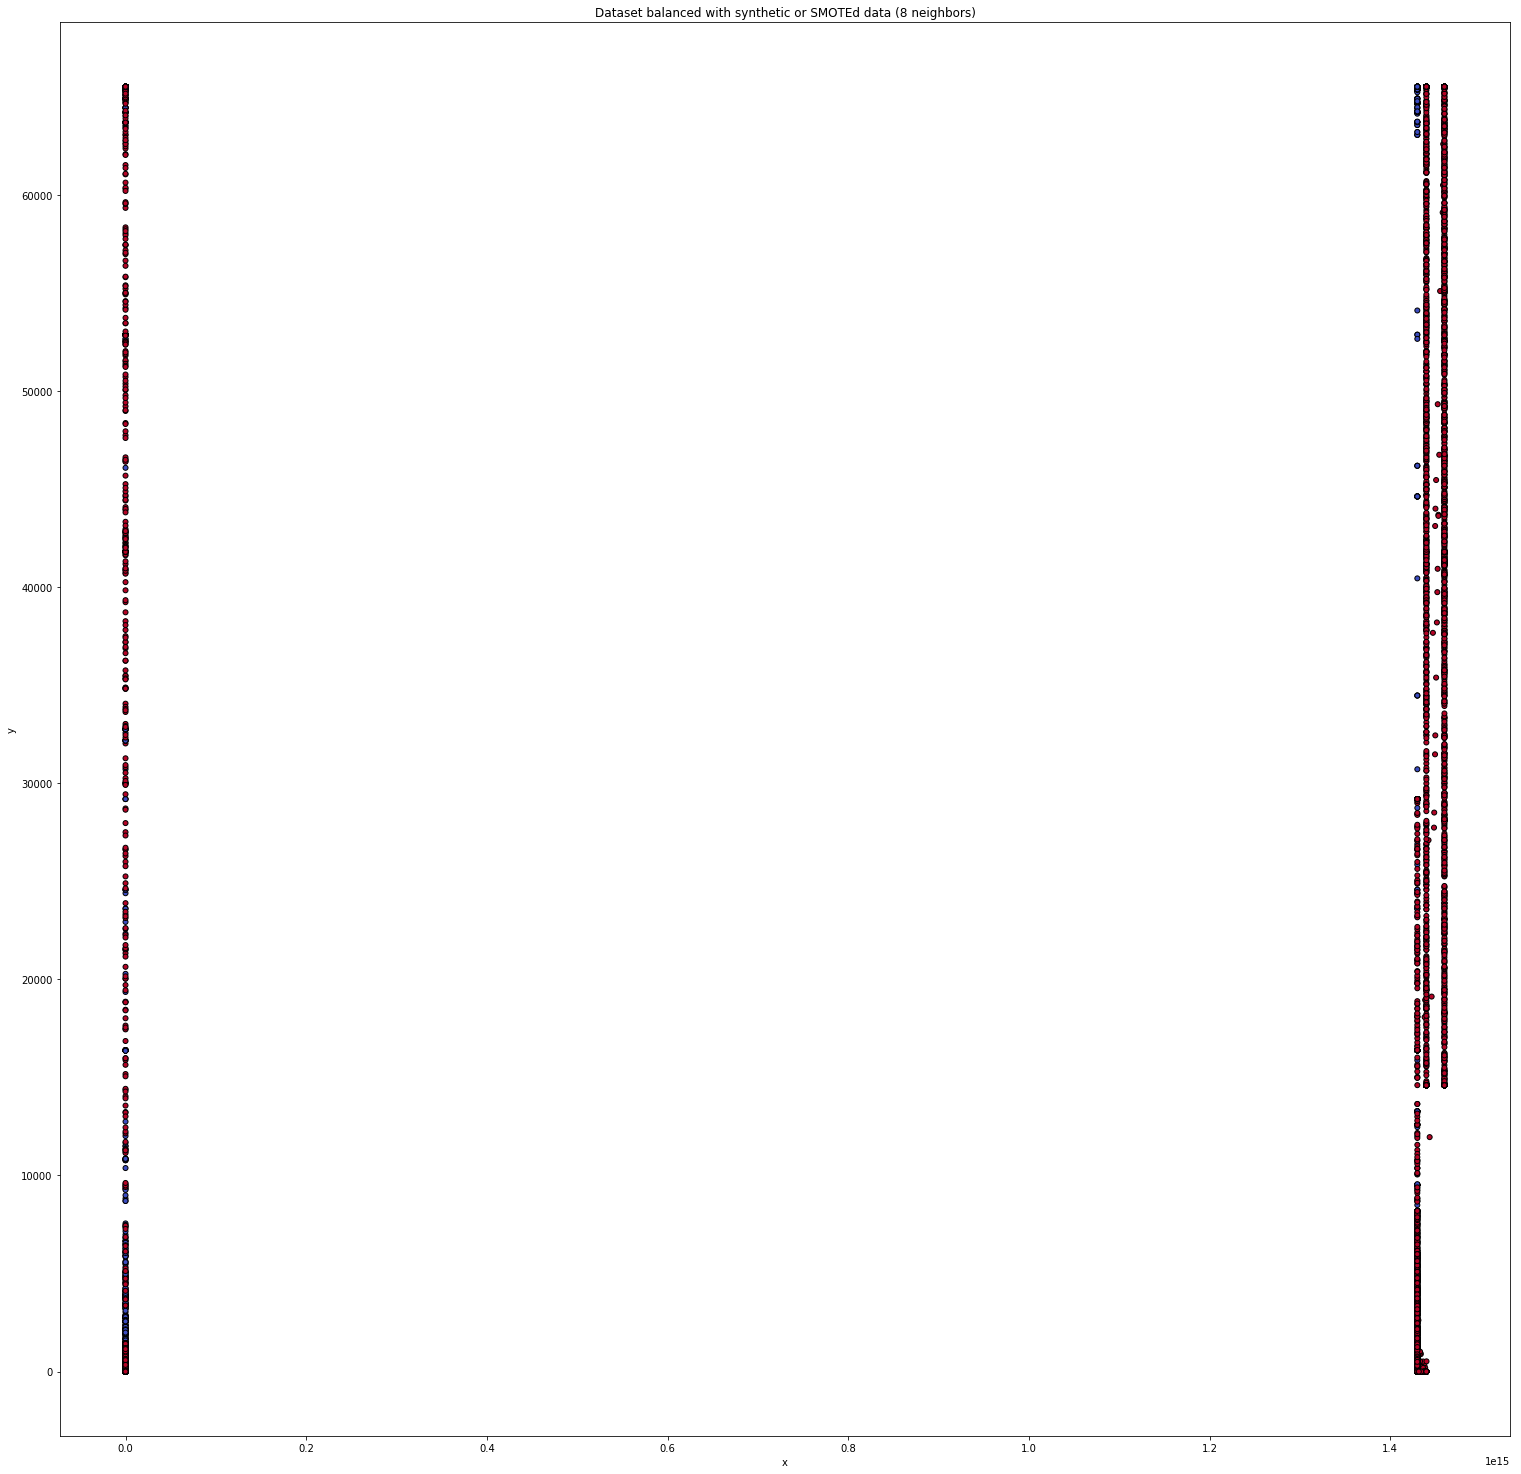

In [11]:
print(X.shape,Y.shape)
pd.value_counts(y_res).plot.bar()
plt.title('Conn class histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')
df['Conn Type'].value_counts()

f = plt.figure()
f.set_figwidth(26)
f.set_figheight(26)
 

plt.title('Dataset balanced with synthetic or SMOTEd data ({} neighbors)'.format(k))

plt.xlabel('x')

plt.ylabel('y')

plt.scatter(X_res.iloc[:, 0], X_res.iloc[:, 1], marker='o', c=y_res,

           s=25, edgecolor='k', cmap=plt.cm.coolwarm)

plt.show()

In [12]:

Xr = pd.DataFrame(X_res)
Yr = pd.DataFrame(y_res)
frames = [Xr, Yr]
result = pd.concat(frames,axis =1)

In [13]:
result

,Idle Max,FWD Init Win Bytes,Idle Mean,Idle Min,Fwd Seg Size Min,Subflow Fwd Packets,Flow Duration,Flow IAT Max,Flow IAT Min,Flow IAT Mean,...,Flow Packets/s,Bwd Init Win Bytes,Protocol,FIN Flag Count,Bwd Packets/s,Fwd IAT Max,Bwd Packet Length Mean,Bwd Packet Length Min,Fwd IAT Total,Conn Type
0,1.460000e+15,65535,1.460000e+15,1.460000e+15,20,0,119384497,10430835,0,4.274418e+04,...,23.403374,65535,6,0,16.978754,10431320,1208.106068,0,119384314,4
1,1.460000e+15,65535,1.460000e+15,1.460000e+15,20,0,119754701,10951164,0,3.366733e+04,...,29.710733,65535,6,0,21.184972,10951327,1151.860465,0,119754701,4
2,1.460000e+15,65535,1.460000e+15,1.460000e+15,20,0,118908117,11346294,0,5.072872e+04,...,19.721110,65535,6,0,13.977179,11346697,1204.348375,0,118908117,4
3,1.460000e+15,41180,1.460000e+15,1.460000e+15,20,0,739728,739526,55,2.465760e+05,...,5.407393,65535,6,0,2.703696,739728,271.500000,0,739728,4
4,1.460000e+15,41180,1.460000e+15,1.460000e+15,20,0,149270,149046,43,4.975667e+04,...,26.797079,65535,6,0,13.398540,149270,282.500000,0,149270,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45701,1.440000e+15,48798,1.440000e+15,1.440000e+15,20,0,28408637,20583182,27,4.262944e+06,...,0.299197,65535,6,0,0.138932,20583182,242.774085,0,28407902,4
45702,1.440000e+15,57967,1.440000e+15,1.440000e+15,20,0,1473379,861211,273,1.733344e+05,...,6.768634,65535,6,0,3.571189,864596,244.766192,0,1473379,4
45703,1.460000e+15,65535,1.460000e+15,1.460000e+15,20,0,119381555,15565223,0,4.343450e+04,...,23.079908,65535,6,0,15.505709,15565223,1112.213301,0,119381348,4
45704,1.440000e+15,65535,1.440000e+15,1.440000e+15,20,0,104712911,25159839,2,3.251492e+05,...,4.045535,65535,6,0,2.372713,25159985,745.125964,0,104712806,4


4    22853
3    22853
Name: Conn Type, dtype: int64

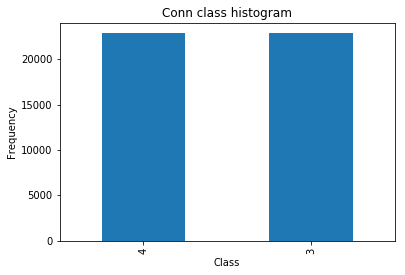

In [14]:
pd.value_counts(result['Conn Type']).plot.bar()
plt.title('Conn class histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')
result['Conn Type'].value_counts()

In [15]:
# Remove duplicate entries
Kresult = pd.concat([df, result])

Kresult.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=False)

len(result)


45706

1    64249
4    22433
2    17959
3    16829
Name: Conn Type, dtype: int64

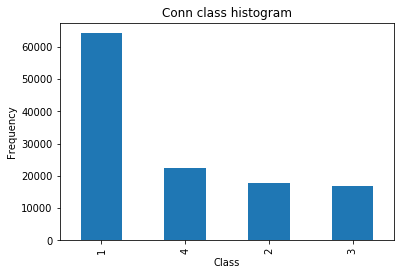

In [16]:
pd.value_counts(Kresult['Conn Type']).plot.bar()
plt.title('Conn class histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')
Kresult['Conn Type'].value_counts()

In [18]:
Kresult.dropna(how='any')

,Idle Max,FWD Init Win Bytes,Idle Mean,Idle Min,Fwd Seg Size Min,Subflow Fwd Packets,Flow Duration,Flow IAT Max,Flow IAT Min,Flow IAT Mean,...,Flow Packets/s,Bwd Init Win Bytes,Protocol,FIN Flag Count,Bwd Packets/s,Fwd IAT Max,Bwd Packet Length Mean,Bwd Packet Length Min,Fwd IAT Total,Conn Type
0,0.000000e+00,1892,0.000000e+00,0.000000e+00,20,0,229,229,229,2.290000e+02,...,8733.624454,1047,6,2,4366.812227,0,0.000000,0,0,1
1,0.000000e+00,1987,0.000000e+00,0.000000e+00,20,0,407,407,407,4.070000e+02,...,4914.004914,1047,6,2,2457.002457,0,0.000000,0,0,1
2,0.000000e+00,2049,0.000000e+00,0.000000e+00,20,0,431,431,431,4.310000e+02,...,4640.371230,1047,6,2,2320.185615,0,0.000000,0,0,1
3,0.000000e+00,2008,0.000000e+00,0.000000e+00,20,0,359,359,359,3.590000e+02,...,5571.030641,1047,6,2,2785.515320,0,0.000000,0,0,1
4,1.440000e+15,1382,1.440000e+15,1.440000e+15,20,0,10778451,78158,13,1.088732e+04,...,91.942711,2320,6,1,37.111084,81171,16.647500,0,10778451,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45701,1.440000e+15,48798,1.440000e+15,1.440000e+15,20,0,28408637,20583182,27,4.262944e+06,...,0.299197,65535,6,0,0.138932,20583182,242.774085,0,28407902,4
45702,1.440000e+15,57967,1.440000e+15,1.440000e+15,20,0,1473379,861211,273,1.733344e+05,...,6.768634,65535,6,0,3.571189,864596,244.766192,0,1473379,4
45703,1.460000e+15,65535,1.460000e+15,1.460000e+15,20,0,119381555,15565223,0,4.343450e+04,...,23.079908,65535,6,0,15.505709,15565223,1112.213301,0,119381348,4
45704,1.440000e+15,65535,1.440000e+15,1.440000e+15,20,0,104712911,25159839,2,3.251492e+05,...,4.045535,65535,6,0,2.372713,25159985,745.125964,0,104712806,4


In [19]:
save = pd.DataFrame(Kresult)
  
# saving the dataframe
save.to_csv('lessSmote.csv')
save

,Idle Max,FWD Init Win Bytes,Idle Mean,Idle Min,Fwd Seg Size Min,Subflow Fwd Packets,Flow Duration,Flow IAT Max,Flow IAT Min,Flow IAT Mean,...,Flow Packets/s,Bwd Init Win Bytes,Protocol,FIN Flag Count,Bwd Packets/s,Fwd IAT Max,Bwd Packet Length Mean,Bwd Packet Length Min,Fwd IAT Total,Conn Type
0,0.000000e+00,1892,0.000000e+00,0.000000e+00,20,0,229,229,229,2.290000e+02,...,8733.624454,1047,6,2,4366.812227,0,0.000000,0,0,1
1,0.000000e+00,1987,0.000000e+00,0.000000e+00,20,0,407,407,407,4.070000e+02,...,4914.004914,1047,6,2,2457.002457,0,0.000000,0,0,1
2,0.000000e+00,2049,0.000000e+00,0.000000e+00,20,0,431,431,431,4.310000e+02,...,4640.371230,1047,6,2,2320.185615,0,0.000000,0,0,1
3,0.000000e+00,2008,0.000000e+00,0.000000e+00,20,0,359,359,359,3.590000e+02,...,5571.030641,1047,6,2,2785.515320,0,0.000000,0,0,1
4,1.440000e+15,1382,1.440000e+15,1.440000e+15,20,0,10778451,78158,13,1.088732e+04,...,91.942711,2320,6,1,37.111084,81171,16.647500,0,10778451,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45701,1.440000e+15,48798,1.440000e+15,1.440000e+15,20,0,28408637,20583182,27,4.262944e+06,...,0.299197,65535,6,0,0.138932,20583182,242.774085,0,28407902,4
45702,1.440000e+15,57967,1.440000e+15,1.440000e+15,20,0,1473379,861211,273,1.733344e+05,...,6.768634,65535,6,0,3.571189,864596,244.766192,0,1473379,4
45703,1.460000e+15,65535,1.460000e+15,1.460000e+15,20,0,119381555,15565223,0,4.343450e+04,...,23.079908,65535,6,0,15.505709,15565223,1112.213301,0,119381348,4
45704,1.440000e+15,65535,1.440000e+15,1.440000e+15,20,0,104712911,25159839,2,3.251492e+05,...,4.045535,65535,6,0,2.372713,25159985,745.125964,0,104712806,4
